<a href="https://colab.research.google.com/github/zhenglinchen1096496/DBU-Python/blob/main/DEMO_5A_Linear_Fit_Metrics_REV2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score

#Graphing Function Definitions

In [ ]:
#@title R-squared and Linear Regression visualized

def plot_negative_Rsquared(size, slope=2, intercept=0, noise_level=3, x_range=5, seed=23, y_min=None, y_max=None):
    MEAN_COLOR = 'red'
    MODEL_COLOR = 'tab:blue'
    DATA_COLOR = 'black'

    # DATA TO USE IN PLOT
    # Generate random linear data
    np.random.seed(seed)
    X_NEG = x_range * np.random.rand(size,1)
    y_NEG = slope*X_NEG + intercept + 2*noise_level * np.random.randn(size, 1)
    # Plot the linear data
    plt.scatter(X_NEG, y_NEG, label='Targets', color=DATA_COLOR) # label='$y_i$')

    # DATA TO FEED MODEL
    # Generate random linear data
    np.random.seed(seed)
    X = x_range * np.random.rand(size,1)
    y = -slope*X + intercept + 7.5 + np.random.randn(size, 1)
    # Plot the linear data
    #plt.scatter(X, y, label='Targets', color=DATA_COLOR) # label='$y_i$')
    #plt.scatter(X, y, label='Targets', color='darkgray') # label='$y_i$')

    # LINEAR REGRESSION - BEST FIT LINE
    # Fit a linear regression model
    model = LinearRegression()
    model.fit(X, y)
    # Get the slope and intercept of the best fit line
    w = model.coef_[0][0]
    b = model.intercept_[0]
    # Plot the best fit line
    x_line = np.linspace(min(X), max(X), 2)
    y_fit = w*x_line + b
    plt.plot(x_line, y_fit, color=MODEL_COLOR, linestyle='--', label='Model Line')

    #  MEAN LINE
    # Plot the horizontal line representing the mean of y-values
    y_mean = np.mean(y_NEG)
    plt.axhline(y=y_mean, color=MEAN_COLOR, linestyle='--', label='Mean of y-values')

    # R-SQUARED
    # Calculate R-squared
    y_pred = model.predict(X)
    r_squared = r2_score(y_NEG, y_pred)
    # Display the R-squared value on the plot
    x_label = (x_line[1]+x_line[0])/3
    plt.text(x_label, y_min+(y_max-y_min)*.05, f'R-squared = {r_squared:.2f}', fontsize=16, color='black')

    # PLOT ADJUSTMENTS
    # Set y-axis limits
    if y_max == None: y_max = max(y*1.1)
    if y_min == None: y_min = min(y*1.2)
    y_range = y_max - y_min
    plt.ylim(y_min, y_max)
    # Set labels and title
    plt.xlabel('X')
    plt.ylabel('y')
    plt.title('Data with Model Line and Mean Line')
    # Show legend
    plt.legend()

    return plt

In [ ]:
#@title R-squared and Linear Regression visualized

def plot_linear_regression_with_mean_line(size, slope=2, intercept=0, noise_level=3, x_range=5, seed=23, y_min=None, y_max=None):
    MEAN_COLOR = 'red'
    MODEL_COLOR = 'tab:blue'
    DATA_COLOR = 'black'

    # DATA
    # Generate random linear data
    np.random.seed(seed)
    X = x_range * np.random.rand(size,1)
    y = slope*X + intercept + noise_level * np.random.randn(size, 1)
    # Plot the linear data
    plt.scatter(X, y, label='Targets', color=DATA_COLOR) # label='$y_i$')
    #plt.scatter(X, y, label='Targets', color='darkgray') # label='$y_i$')

    # LINEAR REGRESSION - BEST FIT LINE
    # Fit a linear regression model
    model = LinearRegression()
    model.fit(X, y)
    # Get the slope and intercept of the best fit line
    w = model.coef_[0][0]
    b = model.intercept_[0]
    # Plot the best fit line
    x_line = np.linspace(min(X), max(X), 2)
    y_fit = w*x_line + b
    plt.plot(x_line, y_fit, color=MODEL_COLOR, linestyle='--', label='Model Line')

    #  MEAN LINE
    # Plot the horizontal line representing the mean of y-values
    y_mean = np.mean(y)
    plt.axhline(y=y_mean, color=MEAN_COLOR, linestyle='--', label='Mean of y-values')

    # R-SQUARED
    # Calculate R-squared
    y_pred = model.predict(X)
    r_squared = r2_score(y, y_pred)
    # Display the R-squared value on the plot
    x_label = (x_line[1]+x_line[0])/3
    plt.text(x_label, y_min+(y_max-y_min)*.05, f'R-squared = {r_squared:.2f}', fontsize=16, color='black')

    # PLOT ADJUSTMENTS
    # Set y-axis limits
    if y_max == None: y_max = max(y*1.1)
    if y_min == None: y_min = min(y*1.2)
    y_range = y_max - y_min
    plt.ylim(y_min, y_max)
    # Set labels and title
    plt.xlabel('X')
    plt.ylabel('y')
    plt.title('Data with Model Line and Mean Line')
    # Show legend
    plt.legend()

    return plt

In [ ]:
#@title Residuals visualized
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression

# colors, the default blue is o, cyan is c, blue is b, black is k, red is r, green is g; tab:blue

def plot_regression_with_residuals(size, slope=2, intercept=0, noise_level=3, x_range=5, seed=23, y_min=None, y_max=None):

    # DATA
    # Generate random linear data
    np.random.seed(seed)
    X = x_range * np.random.rand(size,1)
    y = slope*X + intercept + noise_level * np.random.randn(size, 1)
    # Plot the linear data
    plt.scatter(X, y, label='$y_i$')

    # LINEAR REGRESSION MODEL
    # Fit a linear regression model
    model = LinearRegression()
    model.fit(X, y)
    # Get the slope and intercept of the model
    w = model.coef_[0][0]
    b = model.intercept_[0]

    # RESIDUALS
    # Plot the distance to the model fit for the errors of each data point
    for i in range(len(X)):
        if i == 0:
          plt.scatter(X[i][0], w * X[i][0] + b, marker='D', label='$\\hat{y}_i$', color='red')
          #plt.scatter(X[i][0], w * X[i][0] + b, edgecolor='red', facecolor='white', marker='o', label='$\\hat{y}_i$')
          plt.plot([X[i][0], X[i][0]], [y[i][0], w * X[i][0] + b], '--', lw=1.5, label = "Residuals", color='red')
        else:
          #plt.scatter(X[i][0], w * X[i][0] + b, marker='D', color='tab:blue')
          plt.scatter(X[i][0], w * X[i][0] + b, marker='D', color='red')
          #plt.scatter(X[i][0], w * X[i][0] + b, edgecolor='red', facecolor='white', marker='o')
          plt.plot([X[i][0], X[i][0]], [y[i][0], w * X[i][0] + b], '--', lw=1.5, color='red')

    #  MEAN
    # Plot the horizontal line representing the mean of y-values
    y_mean = np.mean(y)
    plt.axhline(y=y_mean, color='green', linestyle='--', lw=0.75, label='Mean of y-values')

    # PLOT THE MODEL
    x_line = np.linspace(min(X), max(X), 2)
    y_fit = w*x_line + b
    plt.plot(x_line, y_fit, color='red', linestyle='--', lw=0.75, label='Model')

    # # ERRORS
    # # Plot the distance to the mean for the errors of each data point
    # for i in range(len(X)):
    #     if i == 0:
    #       plt.scatter(X[i][0], y_mean, color='tab:blue', marker='D', label='$\\hat{y}_i$')
    #       #plt.scatter(X[i][0], y_mean, edgecolor='red', facecolor='white', marker='o', label='$\\hat{y}_i$')
    #       plt.plot([X[i][0], X[i][0]],  [y[i][0], y_mean], '--', lw=1.5, label = "Residual", color='tab:blue')
    #     else:
    #       plt.scatter(X[i][0], y_mean, color='tab:blue', marker='D', label='$\\hat{y}_i$')
    #       #plt.scatter([X[i][0], y_mean, edgecolor='red', facecolor='white', marker='o')
    #       plt.plot([X[i][0], X[i][0]], [y[i][0], y_mean], '--', lw=1.5, color='tab:blue')

    # R-SQUARED
    # Calculate R-squared
    y_pred = model.predict(X)
    r_squared = r2_score(y, y_pred)
    # Display the R-squared value on the plot
    x_label = (x_line[1]+x_line[0])/3
    plt.text(x_label, y_min*0.8, f'R-squared = {r_squared:.2f}', fontsize=16, color='black')

    # PLOT ADJUSTMENTS
    # Set y-axis limits
    if y_max == None: y_max = max(y*1.1)
    if y_min == None: y_min = min(y*1.2)
    y_range = y_max - y_min
    plt.ylim(y_min, y_max)
    # Set labels and title
    plt.xlabel('X')
    plt.ylabel('y')
    plt.title('Data with Residuals')
    # Show legend
    plt.legend()

    return plt



In [ ]:
#@title Errors visualized

def plot_regression_with_errors(size, slope=2, intercept=0, noise_level=3, x_range=5, seed=23, y_min=None, y_max=None):

    # DATA
    # Generate random linear data
    np.random.seed(seed)
    X = x_range * np.random.rand(size,1)
    y = slope*X + intercept + noise_level * np.random.randn(size, 1)

    # Plot the linear data
    plt.scatter(X, y, label='$y_i$')

    #  MEAN
    y_mean = np.mean(y)

    # ERRORS
    # Plot the distance to the mean for the errors of each data point
    for i in range(len(X)):
        if i == 0:
          plt.scatter(X[i][0], y_mean, color='green', marker='D', label='$\\bar{y}_i$')
          #plt.scatter(X[i][0], y_mean, edgecolor='red', facecolor='white', marker='o', label='$\\hat{y}_i$')
          plt.plot([X[i][0], X[i][0]],  [y[i][0], y_mean], '--', lw=1.5, label = "Errors", color='green')
        else:
          #plt.scatter(X[i][0], y_mean, color='tab:blue', marker='D', )
          plt.scatter(X[i][0], y_mean, color='green', marker='D', )
          #plt.scatter([X[i][0], y_mean, edgecolor='red', facecolor='white', marker='o')
          plt.plot([X[i][0], X[i][0]], [y[i][0], y_mean], '--', lw=1.5, color='green')

    # PLOT MEAN
    # Plot the horizontal line representing the mean of y-values
    y_mean = np.mean(y)
    plt.axhline(y=y_mean, color='green', linestyle='--', lw=0.75, label='Mean of y-values')

    # LINEAR REGRESSION MODEL
    # Fit a linear regression model
    model = LinearRegression()
    model.fit(X, y)
    # Get the slope and intercept of the model
    w = model.coef_[0][0]
    b = model.intercept_[0]
    # # Plot the model
    x_line = np.linspace(min(X), max(X), 2)
    y_fit = w*x_line + b
    plt.plot(x_line, y_fit, color='red', linestyle='--', lw=0.75, label='Model')

    # R-SQUARED
    # Calculate R-squared
    y_pred = model.predict(X)
    r_squared = r2_score(y, y_pred)
    # Display the R-squared value on the plot
    x_label = (x_line[1]+x_line[0])/3
    plt.text(x_label, y_min*0.8, f'R-squared = {r_squared:.2f}', fontsize=16, color='black')

    # PLOT ADJUSTMENTS
    # Set y-axis limits
    if y_max == None: y_max = max(y*1.1)
    if y_min == None: y_min = min(y*1.2)
    y_range = y_max - y_min
    plt.ylim(y_min, y_max)
    # Set labels and title
    plt.xlabel('X')
    plt.ylabel('y')
    plt.title('Data with Errors')
    # Show legend
    plt.legend()

    return plt


In [ ]:
#@title Errors and Residuals visualized
def plot_regression_with_errors_residuals(size, slope=2, intercept=0, noise_level=3, x_range=5, seed=23, y_min=None, y_max=None):
    side = 0.025
    markersize = 15

    # DATA
    # Generate random linear data
    np.random.seed(seed)
    X = x_range * np.random.rand(size,1)
    y = slope*X + intercept + noise_level * np.random.randn(size, 1)
    # Plot the linear data
    plt.scatter(X, y, s=markersize, color='black', label='$y_i$')

    # LINEAR REGRESSION MODEL
    # Fit a linear regression model
    model = LinearRegression()
    model.fit(X, y)
    # Get the slope and intercept of the model
    w = model.coef_[0][0]
    b = model.intercept_[0]

    # RESIDUALS
    # Plot the distance to the model fit for the errors of each data point
    for i in range(len(X)):
        if i == 0:
          #plt.scatter(X[i][0], w * X[i][0] + b, marker='D', s=markersize, label='$\\hat{y}_i$', color='tab:blue')
          #plt.scatter(X[i][0], w * X[i][0] + b, edgecolor='red', facecolor='white', marker='o', label='$\\hat{y}_i$')
          plt.plot([X[i][0]+side, X[i][0]+side], [y[i][0], w * X[i][0] + b], '-', lw=1.5, label = "Residuals", color='tab:blue')
        else:
          #plt.scatter(X[i][0], w * X[i][0] + b, marker='D', s=markersize, color='tab:blue')
          #plt.scatter(X[i][0], w * X[i][0] + b, edgecolor='red', facecolor='white', marker='o')
          plt.plot([X[i][0]+side, X[i][0]+side], [y[i][0], w * X[i][0] + b], '-', lw=1.5, color='tab:blue')

    #  MEAN
    y_mean = np.mean(y)

    # ERRORS
    # Plot the distance to the mean for the errors of each data point
    for i in range(len(X)):
        if i == 0:
          #plt.scatter(X[i][0], y_mean, color='tab:blue', marker='D', s=markersize, label='$\\hat{y}_i$')
          #plt.scatter(X[i][0], y_mean, edgecolor='red', facecolor='white', marker='o', label='$\\hat{y}_i$')
          plt.plot([X[i][0]-side, X[i][0]-side],  [y[i][0], y_mean], '-', lw=1.5, label = "Errors", color='tab:red') #, alpha=0.7)
        else:
          #plt.scatter(X[i][0], y_mean, color='tab:blue', marker='D', s=markersize)
          #plt.scatter([X[i][0], y_mean, edgecolor='red', facecolor='white', marker='o')
          plt.plot([X[i][0]-side, X[i][0]-side], [y[i][0], y_mean], '-', lw=1.5, color='tab:red') #, alpha=0.5)

    # PLOT MEAN
    # Plot the horizontal line representing the mean of y-values
    #plt.axhline(y=y_mean, color='dimgray', linestyle='-', lw=0.75, label='Mean of y-values')
    plt.axhline(y=y_mean, color='tab:red', linestyle='--', lw=0.75, label='Mean of y-values')

    # PLOT THE MODEL
    x_line = np.linspace(min(X), max(X), 2)
    y_fit = w*x_line + b
    #plt.plot(x_line, y_fit, color='dimgrey', linestyle='-', lw=0.75, label='Model')
    plt.plot(x_line, y_fit, color='tab:blue', linestyle='--', lw=0.75, label='Model')

    # Plot the linear data
    plt.scatter(X, y, s=markersize, color='black')

    # R-SQUARED
    # Calculate R-squared
    y_pred = model.predict(X)
    r_squared = r2_score(y, y_pred)
    # Display the R-squared value on the plot
    x_label = (x_line[1]+x_line[0])/3
    plt.text(x_label, y_min*0.8, f'R-squared = {r_squared:.2f}', fontsize=16, color='black')

    # PLOT ADJUSTMENTS
    # Set y-axis limits
    if y_max == None: y_max = max(y*1.1)
    if y_min == None: y_min = min(y*1.2)
    y_range = y_max - y_min
    plt.ylim(y_min, y_max)
    # Set labels and title
    plt.xlabel('X')
    plt.ylabel('y')
    plt.title('Data with Errors and Residuals')
    # Show legend
    plt.legend()

    return plt

In [ ]:
#@title MSE visualized
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

# colors, the default blue is o, cyan is c, blue is b, black is k, red is r, green is g; tab:blue

def plot_regression_with_mse(size, slope=2, intercept=0, noise_level=3, x_range=5, seed=23, y_min=None, y_max=None):

    # DATA
    # Generate random linear data
    np.random.seed(seed)
    X = x_range * np.random.rand(size,1)
    y = slope*X + intercept + noise_level * np.random.randn(size, 1)
    # Plot the linear data
    plt.scatter(X, y, color='black', label='$y_i$')

    # LINEAR REGRESSION MODEL
    # Fit a linear regression model
    model = LinearRegression()
    model.fit(X, y)
    # Get the slope and intercept of the model
    w = model.coef_[0][0]
    b = model.intercept_[0]

    # MSE
    # Plot the distance to the model fit for the errors of each data point
    for i in range(len(X)):
        y_bf = w * X[i][0] + b
        y_i = y[i][0]
        residual = y_i - y_bf
        if y_i < y_bf: res_sq = -residual**2
        else: res_sq = residual**2
        if i == 0:
          #plt.scatter(X[i][0], y_bf, marker='D', label='$\\hat{y}_i$', color='tab:blue')
          #plt.scatter(X[i][0], w * X[i][0] + b, edgecolor='red', facecolor='white', marker='o', label='$\\hat{y}_i$')
          plt.plot([X[i][0], X[i][0]], [y_bf,y_bf+res_sq], '--', lw=1.5, label = "Residuals Squared", color='tab:blue')
        else:
          #plt.scatter(X[i][0], y_bf, marker='D', color='tab:blue')
          #plt.scatter(X[i][0], w * X[i][0] + b, edgecolor='red', facecolor='white', marker='o')
          plt.plot([X[i][0], X[i][0]], [y_bf,y_bf+res_sq], '--', lw=1.5, color='tab:blue')

    # #  MEAN
    # # Plot the horizontal line representing the mean of y-values
    # y_mean = np.mean(y)
    # plt.axhline(y=y_mean, color='dimgray', linestyle='--', lw=0.75, label='Mean of y-values')

    # PLOT THE MODEL
    x_line = np.linspace(min(X), max(X), 2)
    y_fit = w*x_line + b
    #plt.plot(x_line, y_fit, color='dimgrey', linestyle='--', lw=0.75, label='Model')
    plt.plot(x_line, y_fit, color='tab:blue', linestyle='-', lw=0.75, label='Model')

    # # ERRORS
    # # Plot the distance to the mean for the errors of each data point
    # for i in range(len(X)):
    #     if i == 0:
    #       plt.scatter(X[i][0], y_mean, color='tab:blue', marker='D', label='$\\hat{y}_i$')
    #       #plt.scatter(X[i][0], y_mean, edgecolor='red', facecolor='white', marker='o', label='$\\hat{y}_i$')
    #       plt.plot([X[i][0], X[i][0]],  [y[i][0], y_mean], '--', lw=1.5, label = "Residual", color='tab:blue')
    #     else:
    #       plt.scatter(X[i][0], y_mean, color='tab:blue', marker='D', label='$\\hat{y}_i$')
    #       #plt.scatter([X[i][0], y_mean, edgecolor='red', facecolor='white', marker='o')
    #       plt.plot([X[i][0], X[i][0]], [y[i][0], y_mean], '--', lw=1.5, color='tab:blue')

    # R-SQUARED
    # Calculate R-squared
    y_pred = model.predict(X)
    # r_squared = r2_score(y, y_pred)
    # # Display the R-squared value on the plot
    # x_label = (x_line[1]+x_line[0])/3
    # plt.text(x_label, y_min*0.8, f'R-squared = {r_squared:.2f}', fontsize=16, color='black')

    # MSE
    # Calculate MSE using Scikit-learn
    # y_pred = model.predict(X)
    mse = mean_squared_error(y, y_pred)
    # Display the R-squared value on the plot
    x_label = (x_line[1]+x_line[0])/3
    plt.text(x_label, y_min*0.8, f'MSE = {mse:.2f}', fontsize=16, color='black')

    # PLOT ADJUSTMENTS
    # Set y-axis limits
    if y_max == None: y_max = max(y*1.1)
    if y_min == None: y_min = min(y*1.2)
    y_range = y_max - y_min
    plt.ylim(y_min, y_max)
    # Set labels and title
    plt.xlabel('X')
    plt.ylabel('y')
    plt.title('Data with MSE')
    # Show legend
    plt.legend()

    return plt



In [ ]:
#@title MAE visualized
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error

# colors, the default blue is o, cyan is c, blue is b, black is k, red is r, green is g; tab:blue

def plot_regression_with_mae(size, slope=2, intercept=0, noise_level=3, x_range=5, seed=23, y_min=None, y_max=None):

    # DATA
    # Generate random linear data
    np.random.seed(seed)
    X = x_range * np.random.rand(size,1)
    y = slope*X + intercept + noise_level * np.random.randn(size, 1)
    # Plot the linear data
    plt.scatter(X, y, color='black', label='$y_i$') #, s=16)

    # LINEAR REGRESSION MODEL
    # Fit a linear regression model
    model = LinearRegression()
    model.fit(X, y)
    # Get the slope and intercept of the model
    w = model.coef_[0][0]
    b = model.intercept_[0]

    # MSE
    # Plot the distance to the model fit for the errors of each data point
    for i in range(len(X)):
        y_bf = w * X[i][0] + b
        y_i = y[i][0]
        residual = y_i - y_bf
        if i == 0:
          #plt.scatter(X[i][0], y_bf, marker='D', label='$\\hat{y}_i$', color='tab:blue')
          #plt.scatter(X[i][0], w * X[i][0] + b, edgecolor='red', facecolor='white', marker='o', label='$\\hat{y}_i$')
          plt.plot([X[i][0], X[i][0]], [y_bf,y_bf+residual], '--', lw=1.5, label = "Residuals", color='tab:blue')
        else:
          #plt.scatter(X[i][0], y_bf, marker='D', color='tab:blue')
          #plt.scatter(X[i][0], w * X[i][0] + b, edgecolor='red', facecolor='white', marker='o')
          plt.plot([X[i][0], X[i][0]], [y_bf,y_bf+residual], '--', lw=1.5, color='tab:blue')

    # #  MEAN
    # # Plot the horizontal line representing the mean of y-values
    # y_mean = np.mean(y)
    # plt.axhline(y=y_mean, color='dimgray', linestyle='--', lw=0.75, label='Mean of y-values')

    # PLOT THE MODEL
    x_line = np.linspace(min(X), max(X), 2)
    y_fit = w*x_line + b
    #plt.plot(x_line, y_fit, color='dimgrey', linestyle='--', lw=0.75, label='Model')
    plt.plot(x_line, y_fit, color='tab:blue', linestyle='-', lw=0.75, label='Model')

    # # ERRORS
    # # Plot the distance to the mean for the errors of each data point
    # for i in range(len(X)):
    #     if i == 0:
    #       plt.scatter(X[i][0], y_mean, color='tab:blue', marker='D', label='$\\hat{y}_i$')
    #       #plt.scatter(X[i][0], y_mean, edgecolor='red', facecolor='white', marker='o', label='$\\hat{y}_i$')
    #       plt.plot([X[i][0], X[i][0]],  [y[i][0], y_mean], '--', lw=1.5, label = "Residual", color='tab:blue')
    #     else:
    #       plt.scatter(X[i][0], y_mean, color='tab:blue', marker='D', label='$\\hat{y}_i$')
    #       #plt.scatter([X[i][0], y_mean, edgecolor='red', facecolor='white', marker='o')
    #       plt.plot([X[i][0], X[i][0]], [y[i][0], y_mean], '--', lw=1.5, color='tab:blue')

    # R-SQUARED
    # Calculate R-squared
    y_pred = model.predict(X)
    # r_squared = r2_score(y, y_pred)
    # # Display the R-squared value on the plot
    # x_label = (x_line[1]+x_line[0])/3
    # plt.text(x_label, y_min*0.8, f'R-squared = {r_squared:.2f}', fontsize=16, color='black')

    # MSE
    # Calculate MSE using Scikit-learn
    # y_pred = model.predict(X)
    mae = mean_absolute_error(y, y_pred)
    # Display the R-squared value on the plot
    x_label = (x_line[1]+x_line[0])/3
    plt.text(x_label, y_min*0.8, f'MAE = {mae:.2f}', fontsize=16, color='black')

    # PLOT ADJUSTMENTS
    # Set y-axis limits
    if y_max == None: y_max = max(y*1.1)
    if y_min == None: y_min = min(y*1.2)
    y_range = y_max - y_min
    plt.ylim(y_min, y_max)
    # Set labels and title
    plt.xlabel('X')
    plt.ylabel('y')
    plt.title('Data with MAE')
    # Show legend
    plt.legend()

    return plt


# R squared VS Data Attributes




## Negative R-squared

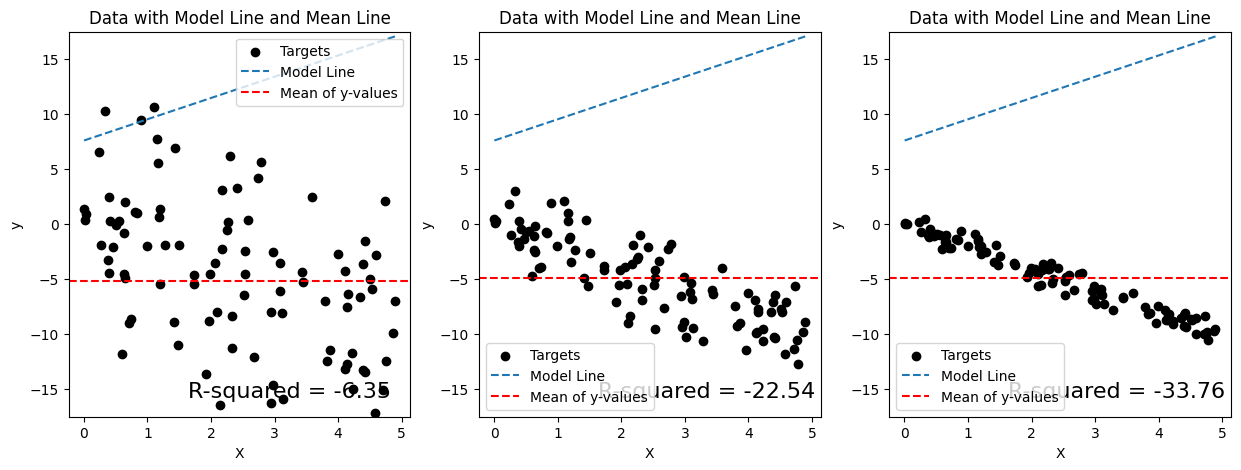

In [ ]:
NUM_POINTS = 100

# Create a 1x3 grid of subplots
fig, axs = plt.subplots(1, 3, figsize=(15, 5))

SLOPE_NEG_EX = -2

# Plot on the first subplot
plt.sca(axs[0])
plt1 = plot_negative_Rsquared(NUM_POINTS, noise_level=3, y_max=17.5, y_min=-17.5, slope=SLOPE_NEG_EX)

# Plot on the second subplot
plt.sca(axs[1])
plt2 = plot_negative_Rsquared(NUM_POINTS, noise_level=1, y_max=17.5, y_min=-17.5, slope=SLOPE_NEG_EX)

# Plot on the third subplot
plt.sca(axs[2])
plt3 = plot_negative_Rsquared(NUM_POINTS, noise_level=0.3, y_max=17.5, y_min=-17.5, slope=SLOPE_NEG_EX)

# Show the plots
plt.show()

## R-squared vs Noise

R-squared increases with descreasing noise.

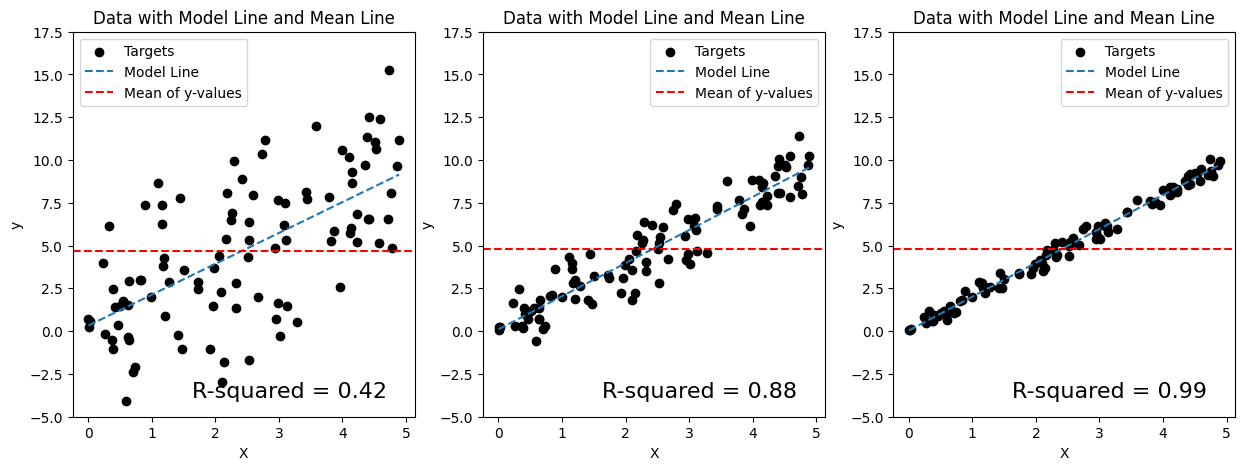

In [ ]:
NUM_POINTS = 100

# Create a 1x3 grid of subplots
fig, axs = plt.subplots(1, 3, figsize=(15, 5))

# Plot on the first subplot
plt.sca(axs[0])
plt1 = plot_linear_regression_with_mean_line(NUM_POINTS, noise_level=3, y_max=17.5, y_min=-5)

# Plot on the second subplot
plt.sca(axs[1])
plt2 = plot_linear_regression_with_mean_line(NUM_POINTS, noise_level=1, y_max=17.5, y_min=-5)

# Plot on the third subplot
plt.sca(axs[2])
plt3 = plot_linear_regression_with_mean_line(NUM_POINTS, noise_level=0.3, y_max=17.5, y_min=-5)

# Show the plots
plt.show()

##Residuals and Errors Visualizations

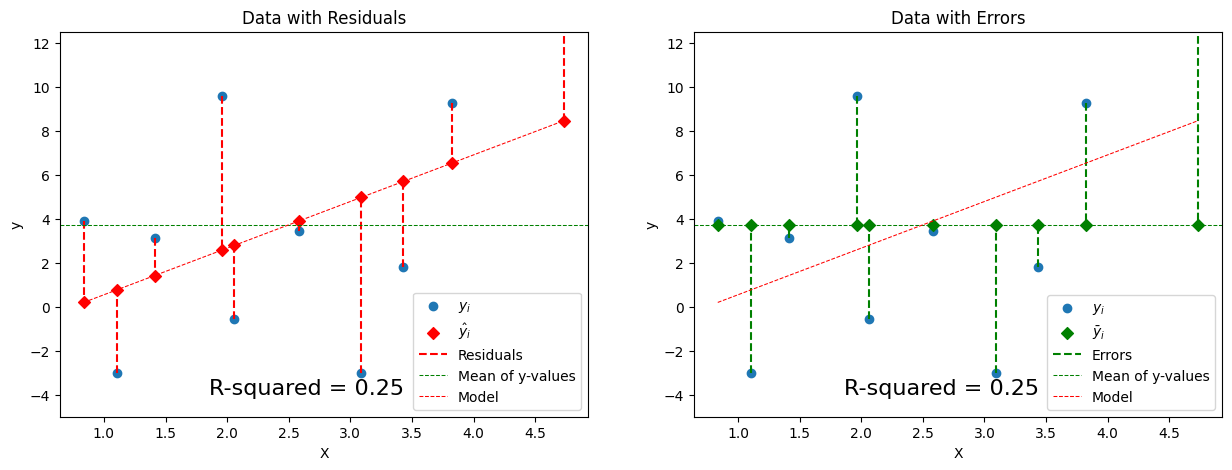

In [ ]:
# Example usage - NOT USING THIS ONE - ABANDONED
NUM_POINTS = 10

NOISE_E = 5
SLOPE_E = 2
Y_INT_E = 0

# Create a 1x3 grid of subplots
fig, axs = plt.subplots(1, 2, figsize=(15, 5))

# Plot on the first subplot
plt.sca(axs[0])
plt1 = plot_regression_with_residuals(NUM_POINTS, noise_level=NOISE_E, y_max=12.5, y_min=-5, slope=SLOPE_E, intercept = Y_INT_E)
#plt1.show()

# Plot on the first subplot
plt.sca(axs[1])
plt2 = plot_regression_with_errors(NUM_POINTS, noise_level=NOISE_E, y_max=12.5, y_min=-5, slope=SLOPE_E, intercept = Y_INT_E)

# Show the plots
plt.show()

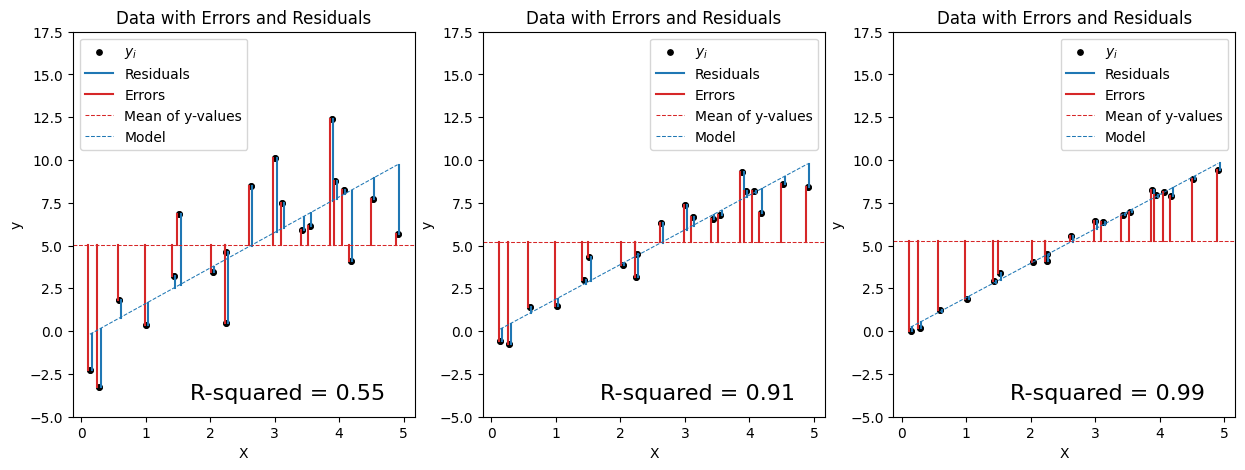

In [ ]:
# Example usage
NUM_POINTS = 20
SEED = 40

# Create a 1x3 grid of subplots
fig, axs = plt.subplots(1, 3, figsize=(15, 5))

# Plot on the first subplot
plt.sca(axs[0])
plt1 = plot_regression_with_errors_residuals(NUM_POINTS, noise_level=3, y_max=17.5, y_min=-5, seed=SEED)

# Plot on the second subplot
plt.sca(axs[1])
plt2 = plot_regression_with_errors_residuals(NUM_POINTS, noise_level=1, y_max=17.5, y_min=-5, seed=SEED)

# Plot on the third subplot
plt.sca(axs[2])
plt3 = plot_regression_with_errors_residuals(NUM_POINTS, noise_level=0.3, y_max=17.5, y_min=-5, seed=SEED)

# Show the plots
plt.show()

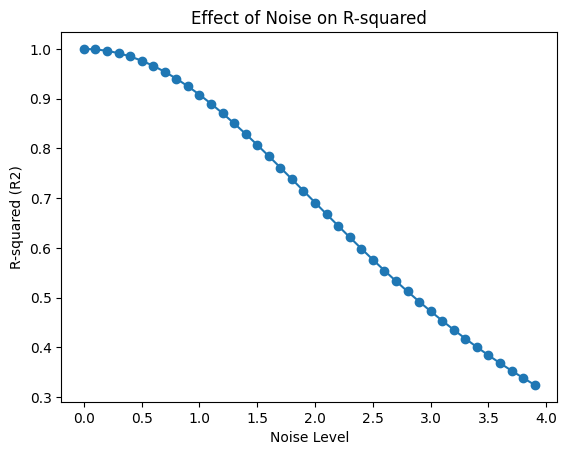

In [ ]:
#@title R-sqaured vs Noise

import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

def generate_linear_data(size, slope=2, intercept=0, x_range=5, seed=42, noise_level=0):
    np.random.seed(seed)
    X = x_range * np.random.rand(size, 1)
    y = slope * X + intercept + noise_level * np.random.randn(size, 1)
    return X, y

def calculate_r2(X, y, noise_level):
    model = LinearRegression()
    model.fit(X, y)
    y_pred = model.predict(X)
    r2 = r2_score(y, y_pred)
    return r2

# Parameters
size = 100
slope = 2
intercept = 0
x_range = 5
seed = 42

# Varying levels of noise
noise_levels = np.arange(0, 4, 0.1)

# Calculate MSE for each noise level
r2_values = []

for noise_level in noise_levels:
    X, y = generate_linear_data(size, slope, intercept, x_range, seed, noise_level)
    r2 = calculate_r2(X, y, noise_level)
    r2_values.append(r2)

# Plot the results
plt.plot(noise_levels, r2_values, marker='o')
plt.title('Effect of Noise on R-squared')
plt.xlabel('Noise Level')
plt.ylabel('R-squared (R2)')
plt.show()

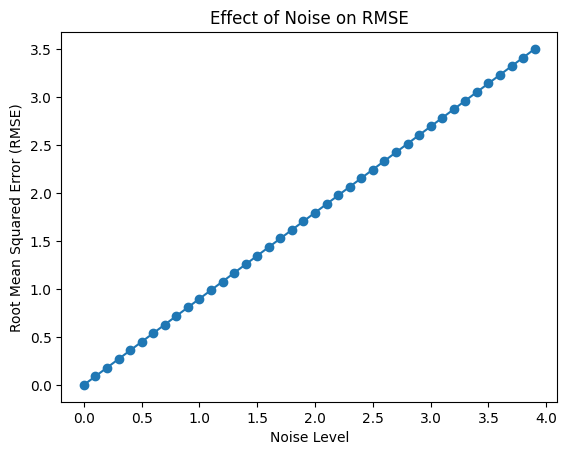

In [ ]:
#@title RMSE vs Noise

import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

def generate_linear_data(size, slope=2, intercept=0, x_range=5, seed=42, noise_level=0):
    np.random.seed(seed)
    X = x_range * np.random.rand(size, 1)
    y = slope * X + intercept + noise_level * np.random.randn(size, 1)
    return X, y

def calculate_rmse(X, y, noise_level):
    model = LinearRegression()
    model.fit(X, y)
    y_pred = model.predict(X)
    mse = mean_squared_error(y, y_pred)
    rmse = np.sqrt(mse)
    return rmse

# Parameters
size = 100
slope = 2
intercept = 0
x_range = 5
seed = 42

# Varying levels of noise
noise_levels = np.arange(0, 4, 0.1)

# Calculate MSE for each noise level
rmse_values = []

for noise_level in noise_levels:
    X, y = generate_linear_data(size, slope, intercept, x_range, seed, noise_level)
    rmse = calculate_rmse(X, y, noise_level)
    rmse_values.append(rmse)

# Plot the results
plt.plot(noise_levels, rmse_values, marker='o')
plt.title('Effect of Noise on RMSE')
plt.xlabel('Noise Level')
plt.ylabel('Root Mean Squared Error (RMSE)')
plt.show()

## R-squared vs Slope

For the same noise, r-squared will decrease with decreasing slope.

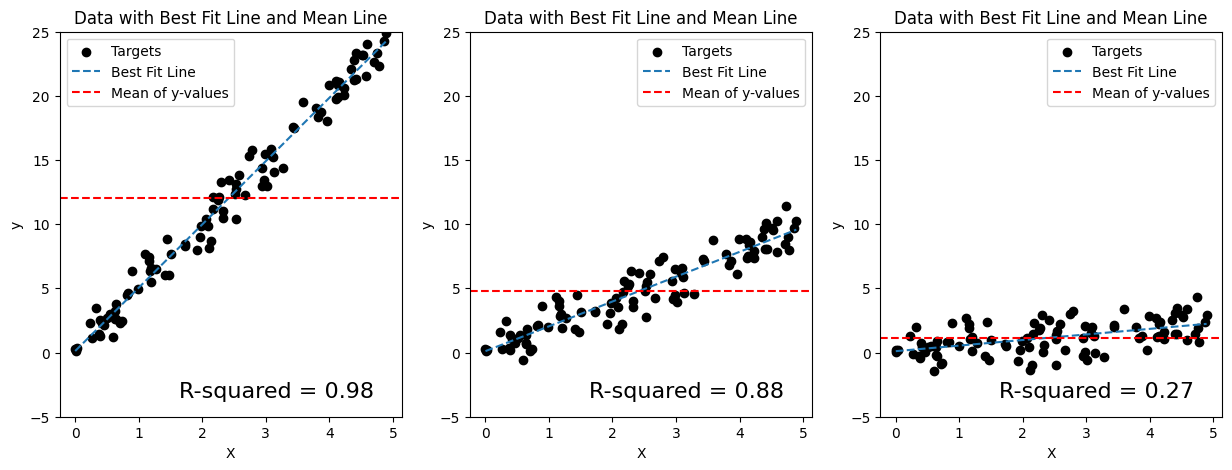

In [ ]:
NUM_POINTS = 100
YMAX = 25

# Create a 1x3 grid of subplots
fig, axs = plt.subplots(1, 3, figsize=(15, 5))

# Plot on the first subplot
plt.sca(axs[0])
plt1 = plot_linear_regression_with_mean_line(NUM_POINTS, noise_level=1, y_max=YMAX, y_min=-5, slope=5)

# Plot on the second subplot
plt.sca(axs[1])
plt2 = plot_linear_regression_with_mean_line(NUM_POINTS, noise_level=1, y_max=YMAX, y_min=-5, slope=2)

# Plot on the third subplot
plt.sca(axs[2])
plt3 = plot_linear_regression_with_mean_line(NUM_POINTS, noise_level=1, y_max=YMAX, y_min=-5, slope=0.5)

# Show the plots
plt.show()

## R-squared vs Positive and Negative Slope

R-squared is positive with positive or negative slopes.

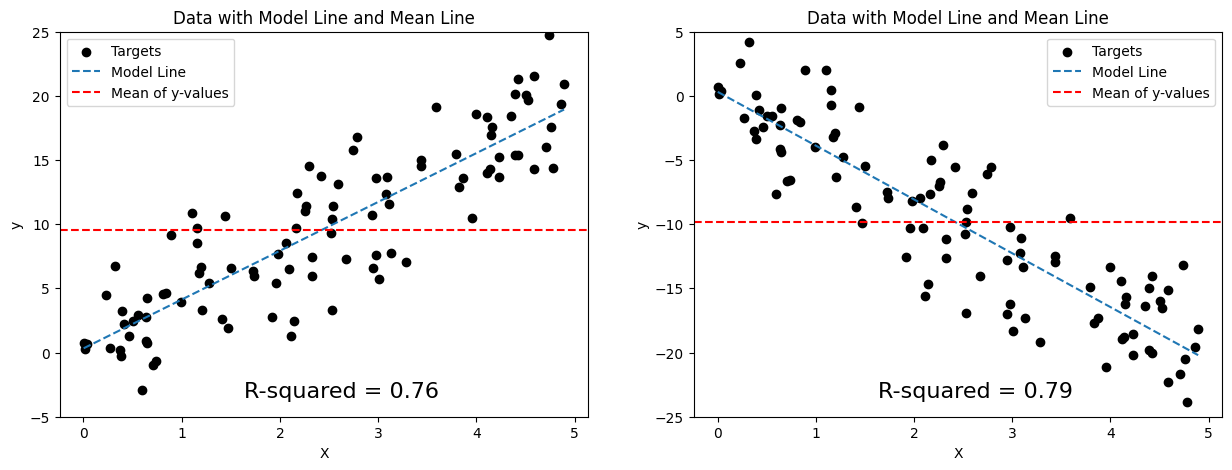

In [ ]:
NUM_POINTS = 100
YMAX = 25

# Create a 1x3 grid of subplots
fig, axs = plt.subplots(1, 2, figsize=(15, 5))

# Plot on the first subplot
plt.sca(axs[0])
plt1 = plot_linear_regression_with_mean_line(NUM_POINTS, noise_level=3, y_max=YMAX, y_min=-5, slope=4)

# Plot on the second subplot
plt.sca(axs[1])
plt2 = plot_linear_regression_with_mean_line(NUM_POINTS, noise_level=3, y_max=5, y_min=-YMAX, slope=-4)

# Show the plots
plt.show()

## R-squared with constant Noise-to-Slope Ratio

What really matters is the size of the noise vs the slope.

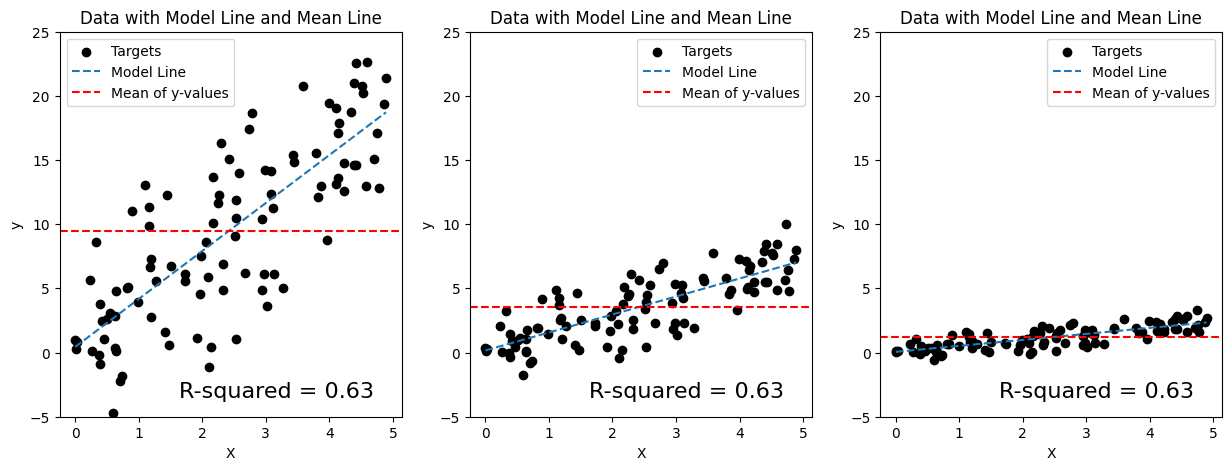

In [ ]:
NUM_POINTS = 100
YMAX = 25
INT = 0
NOISE_DIV_SLOPE = 1

# Create a 1x3 grid of subplots
fig, axs = plt.subplots(1, 3, figsize=(15, 5))

# Plot on the first subplot
plt.sca(axs[0])
noise = 4
slope = noise/NOISE_DIV_SLOPE
plt1 = plot_linear_regression_with_mean_line(NUM_POINTS, noise_level=noise, y_max=YMAX, y_min=-5, slope=slope, intercept=INT)

# Plot on the second subplot
plt.sca(axs[1])
noise = 1.5
slope = noise/NOISE_DIV_SLOPE
plt2 = plot_linear_regression_with_mean_line(NUM_POINTS, noise_level=noise, y_max=YMAX, y_min=-5, slope=slope, intercept=INT)

# Plot on the third subplot
plt.sca(axs[2])
noise = 0.5
slope = noise/NOISE_DIV_SLOPE
plt3 = plot_linear_regression_with_mean_line(NUM_POINTS, noise_level=noise, y_max=YMAX, y_min=-5, slope=slope, intercept=INT)

# Show the plots
plt.show()

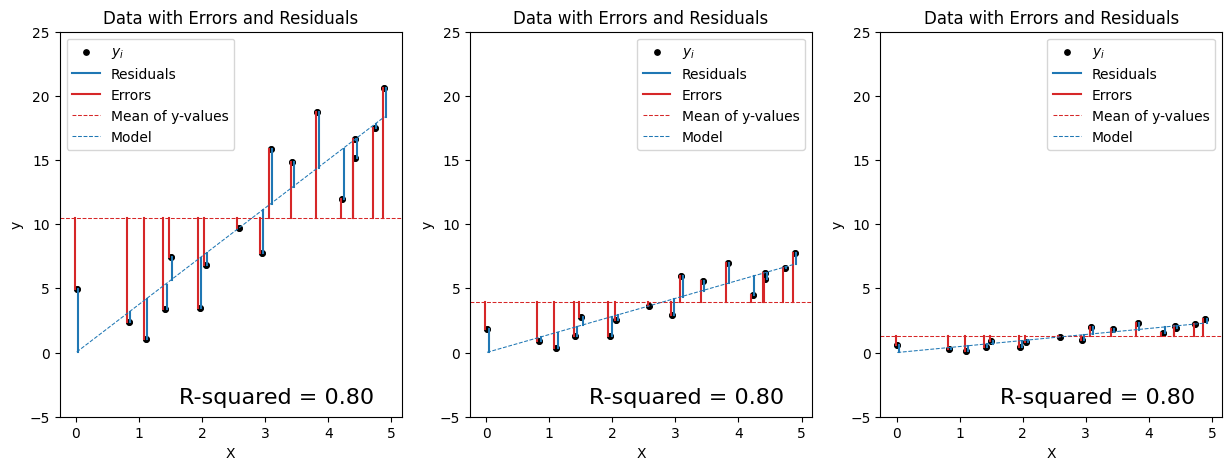

In [ ]:
NUM_POINTS = 17
YMAX = 25
INT = 0
NOISE_DIV_SLOPE = 1

# Create a 1x3 grid of subplots
fig, axs = plt.subplots(1, 3, figsize=(15, 5))

# Plot on the first subplot
plt.sca(axs[0])
noise = 4
slope = noise/NOISE_DIV_SLOPE
plt1 = plot_regression_with_errors_residuals(NUM_POINTS, noise_level=noise, y_max=YMAX, y_min=-5, slope=slope, intercept=INT)

# Plot on the second subplot
plt.sca(axs[1])
noise = 1.5
slope = noise/NOISE_DIV_SLOPE
plt2 = plot_regression_with_errors_residuals(NUM_POINTS, noise_level=noise, y_max=YMAX, y_min=-5, slope=slope, intercept=INT)

# Plot on the third subplot
plt.sca(axs[2])
noise = 0.5
slope = noise/NOISE_DIV_SLOPE
plt3 = plot_regression_with_errors_residuals(NUM_POINTS, noise_level=noise, y_max=YMAX, y_min=-5, slope=slope, intercept=INT)

# Show the plots
plt.show()

## R-squared vs Y-intercept

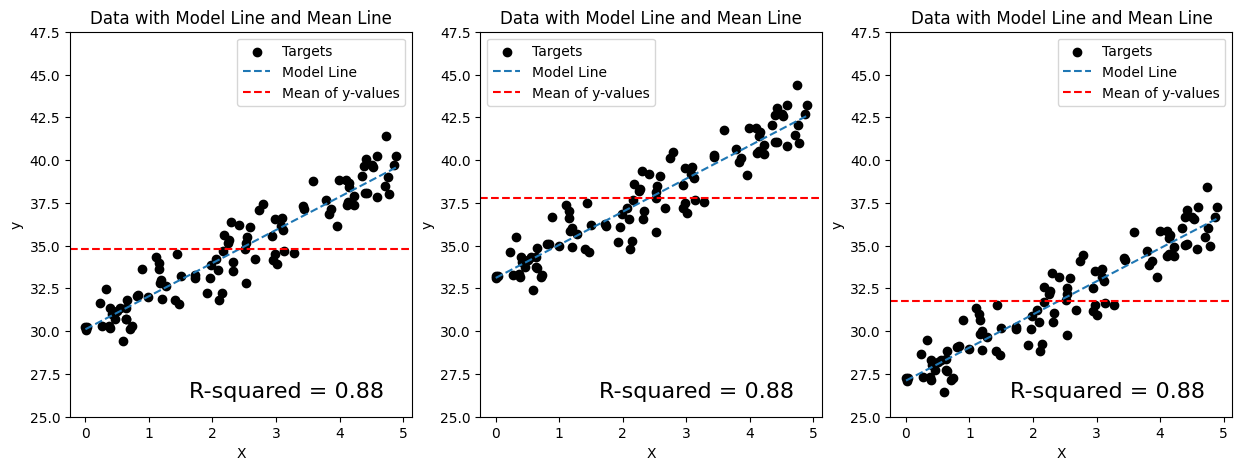

In [ ]:
NUM_POINTS = 100
INT = 30
YMAX = 17.5

# Create a 1x3 grid of subplots
fig, axs = plt.subplots(1, 3, figsize=(15, 5))

# Plot on the first subplot
plt.sca(axs[0])
plt1 = plot_linear_regression_with_mean_line(NUM_POINTS, noise_level=1, intercept=INT, y_max=YMAX+INT, y_min=-5+INT)

# Plot on the second subplot
plt.sca(axs[1])
plt2 = plot_linear_regression_with_mean_line(NUM_POINTS, noise_level=1, intercept=INT+3, y_max=YMAX+INT, y_min=-5+INT)

# Plot on the third subplot
plt.sca(axs[2])
plt3 = plot_linear_regression_with_mean_line(NUM_POINTS, noise_level=1, intercept=INT-3, y_max=YMAX+INT, y_min=-5+INT)

# Show the plots
plt.show()

#MAE

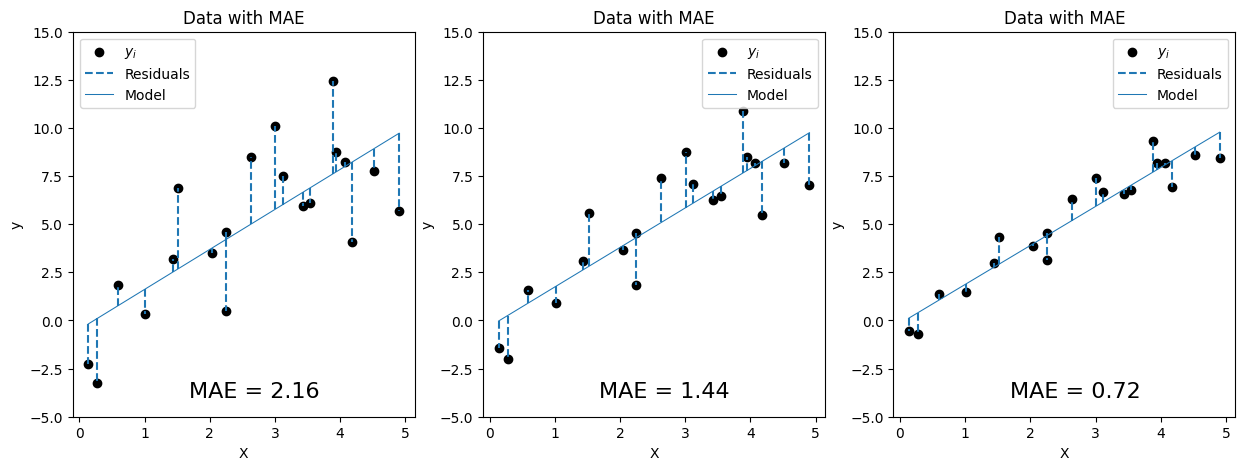

In [ ]:
#@title Regression - MAE visualized vs Noise

# Example usage
NUM_POINTS = 20
SEED = 40
YMAX = 15
YMIN = -5

# Create a 1x3 grid of subplots
fig, axs = plt.subplots(1, 3, figsize=(15, 5))

# Plot on the first subplot
plt.sca(axs[0])
plt1 = plot_regression_with_mae(NUM_POINTS, noise_level=3, y_max=YMAX, y_min=YMIN, seed=SEED)

# Plot on the second subplot
plt.sca(axs[1])
plt2 = plot_regression_with_mae(NUM_POINTS, noise_level=2, y_max=YMAX, y_min=YMIN, seed=SEED)

# Plot on the third subplot
plt.sca(axs[2])
plt3 = plot_regression_with_mae(NUM_POINTS, noise_level=1, y_max=YMAX, y_min=YMIN, seed=SEED)

# Show the plots
plt.show()

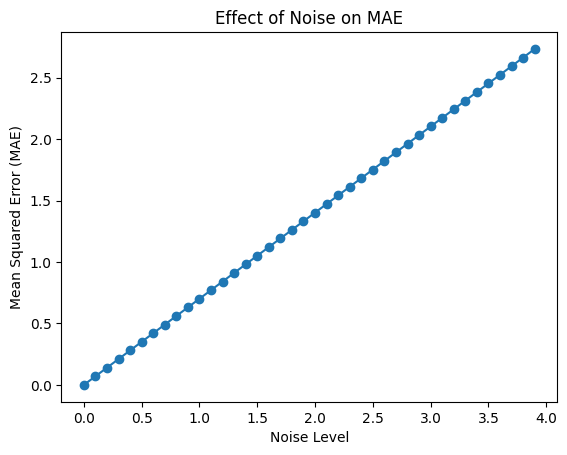

In [ ]:
#@title MAE vs Noise

import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error

def generate_linear_data(size, slope=2, intercept=0, x_range=5, seed=42, noise_level=0):
    np.random.seed(seed)
    X = x_range * np.random.rand(size, 1)
    y = slope * X + intercept + noise_level * np.random.randn(size, 1)
    return X, y

def calculate_mae(X, y, noise_level):
    model = LinearRegression()
    model.fit(X, y)
    y_pred = model.predict(X)
    mae = mean_absolute_error(y, y_pred)
    return mae

# Parameters
size = 100
slope = 2
intercept = 0
x_range = 5
seed = 42

# Varying levels of noise
noise_levels = np.arange(0, 4, 0.1)

# Calculate MSE for each noise level
mae_values = []

for noise_level in noise_levels:
    X, y = generate_linear_data(size, slope, intercept, x_range, seed, noise_level)
    mae = calculate_mae(X, y, noise_level)
    mae_values.append(mae)

# Plot the results
plt.plot(noise_levels, mae_values, marker='o')
plt.title('Effect of Noise on MAE')
plt.xlabel('Noise Level')
plt.ylabel('Mean Squared Error (MAE)')
plt.show()

#MSE

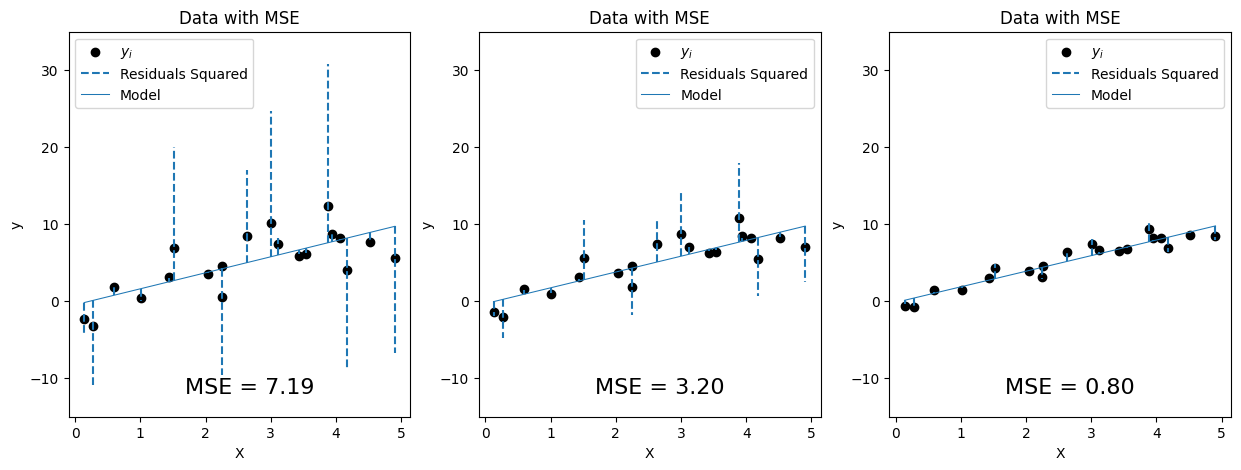

In [ ]:
#@title Regression - MSE visualized vs Noise

# Example usage
NUM_POINTS = 20
SEED = 40
YMAX = 35
YMIN = -15

# Create a 1x3 grid of subplots
fig, axs = plt.subplots(1, 3, figsize=(15, 5))

# Plot on the first subplot
plt.sca(axs[0])
plt1 = plot_regression_with_mse(NUM_POINTS, noise_level=3, y_max=YMAX, y_min=YMIN, seed=SEED)

# Plot on the second subplot
plt.sca(axs[1])
plt2 = plot_regression_with_mse(NUM_POINTS, noise_level=2, y_max=YMAX, y_min=YMIN, seed=SEED)

# Plot on the third subplot
plt.sca(axs[2])
plt3 = plot_regression_with_mse(NUM_POINTS, noise_level=1, y_max=YMAX, y_min=YMIN, seed=SEED)

# Show the plots
plt.show()

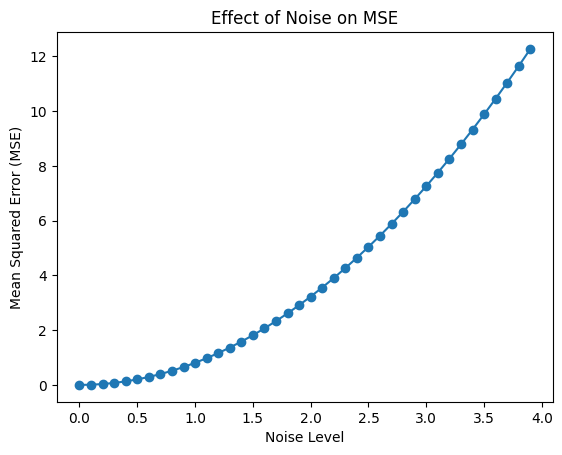

In [ ]:
#@title MSE vs Noise

import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

def generate_linear_data(size, slope=2, intercept=0, x_range=5, seed=42, noise_level=0):
    np.random.seed(seed)
    X = x_range * np.random.rand(size, 1)
    y = slope * X + intercept + noise_level * np.random.randn(size, 1)
    return X, y

def calculate_mse(X, y, noise_level):
    model = LinearRegression()
    model.fit(X, y)
    y_pred = model.predict(X)
    mse = mean_squared_error(y, y_pred)
    return mse

# Parameters
size = 100
slope = 2
intercept = 0
x_range = 5
seed = 42

# Varying levels of noise
noise_levels = np.arange(0, 4, 0.1)

# Calculate MSE for each noise level
mse_values = []

for noise_level in noise_levels:
    X, y = generate_linear_data(size, slope, intercept, x_range, seed, noise_level)
    mse = calculate_mse(X, y, noise_level)
    mse_values.append(mse)

# Plot the results
plt.plot(noise_levels, mse_values, marker='o')
plt.title('Effect of Noise on MSE')
plt.xlabel('Noise Level')
plt.ylabel('Mean Squared Error (MSE)')
plt.show()
